In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import seaborn as sns
from glob import glob

This is the first one I did for the EDA presentation

In [4]:
fpath_demand = glob('../data/*.csv')
print(fpath_demand)


['../data/2009-18_NEMdemand.csv', '../data/2009-18_NEMtotaldemand.csv', '../data/TRADING_PRICE_DEMAND.csv']


In [5]:
fpath_demand = '../data/2009-18_NEMtotaldemand.csv'

In [11]:
fpath_temp = glob('../../BoM/Temp-csvs/*/*temps*')
print(fpath_temp)

[]


In [25]:
temps = pd.read_csv(fpath_temp, index_col=0, parse_dates=[0])
temps.head()

,Year,Month,DayofMonth,isWeekend,SydOlyP_MinT_66212,HobElls_MaxT_94029,MelbOlyP_MinT_86338,MelbOlyP_MaxT_86338,SydOlyP_MaxT_66212,HobElls_MinT_94029,Bris_MinT_40913,Bris_MaxT_40913,CanbAP_MinT_70351,AdldWT_MaxT_23000,AdldWT_MinT_23000,CanbAP_MaxT_70351
Date,,,,,,,,,,,,,,,,
2000-01-02,2000,1,2,1,NaN,19.5,NaN,NaN,NaN,11.0,18.0,27.0,NaN,NaN,NaN,NaN
2000-01-03,2000,1,3,0,NaN,26.8,NaN,NaN,NaN,12.0,20.0,27.0,NaN,NaN,NaN,NaN
2000-01-04,2000,1,4,0,NaN,12.1,NaN,NaN,NaN,12.0,19.0,28.0,NaN,NaN,NaN,NaN
2000-01-05,2000,1,5,0,NaN,16.9,NaN,NaN,NaN,9.5,20.0,33.0,NaN,NaN,NaN,NaN
2000-01-06,2000,1,6,0,NaN,17.4,NaN,NaN,NaN,9.0,21.0,27.0,NaN,NaN,NaN,NaN


In [21]:
demand = pd.read_csv(fpath_demand, index_col=0, parse_dates=[0])
demand.head()

,NSW1,QLD1,SA1,TAS1,VIC1,NEMtotal,ISSUED
2017-12-24 00:00:00,7255.0,6198.0,1580.0,1070.0,4630.0,20733.0,2017-12-24 00:00:51
2017-12-24 00:30:00,7028.0,5977.0,1513.0,1075.0,4433.0,20026.0,2017-12-24 00:30:22
2017-12-24 01:00:00,6805.0,5805.0,1448.0,1066.0,4286.0,19410.0,2017-12-24 01:01:16
2017-12-24 01:30:00,6513.0,5696.0,1358.0,1066.0,4159.0,18792.0,2017-12-24 01:30:47
2017-12-24 02:00:00,6301.0,5587.0,1310.0,1060.0,4010.0,18268.0,2017-12-24 02:00:19


In [22]:
demand.index.dtype

dtype('<M8[ns]')

In [40]:
demand['Date'] = pd.to_datetime(demand.index.date)
demand.head()

,NSW1,QLD1,SA1,TAS1,VIC1,NEMtotal,ISSUED,Date
2017-12-24 00:00:00,7255.0,6198.0,1580.0,1070.0,4630.0,20733.0,2017-12-24 00:00:51,2017-12-24
2017-12-24 00:30:00,7028.0,5977.0,1513.0,1075.0,4433.0,20026.0,2017-12-24 00:30:22,2017-12-24
2017-12-24 01:00:00,6805.0,5805.0,1448.0,1066.0,4286.0,19410.0,2017-12-24 01:01:16,2017-12-24
2017-12-24 01:30:00,6513.0,5696.0,1358.0,1066.0,4159.0,18792.0,2017-12-24 01:30:47,2017-12-24
2017-12-24 02:00:00,6301.0,5587.0,1310.0,1060.0,4010.0,18268.0,2017-12-24 02:00:19,2017-12-24


In [45]:
alldf = pd.merge(demand, temps, how='left', left_on='Date', right_index=True)
# as is left merge, just grabs the corresponding temps for each day for each 48 half-hour timestep in demand df
alldf.head()

,NSW1,QLD1,SA1,TAS1,VIC1,NEMtotal,ISSUED,Date,Year,Month,...,MelbOlyP_MinT_86338,MelbOlyP_MaxT_86338,SydOlyP_MaxT_66212,HobElls_MinT_94029,Bris_MinT_40913,Bris_MaxT_40913,CanbAP_MinT_70351,AdldWT_MaxT_23000,AdldWT_MinT_23000,CanbAP_MaxT_70351
2017-12-24 00:00:00,7255.0,6198.0,1580.0,1070.0,4630.0,20733.0,2017-12-24 00:00:51,2017-12-24,2017,12,...,15.8,19.4,40.7,10.9,20.9,33.0,13.2,24.1,16.0,34.8
2017-12-24 00:30:00,7028.0,5977.0,1513.0,1075.0,4433.0,20026.0,2017-12-24 00:30:22,2017-12-24,2017,12,...,15.8,19.4,40.7,10.9,20.9,33.0,13.2,24.1,16.0,34.8
2017-12-24 01:00:00,6805.0,5805.0,1448.0,1066.0,4286.0,19410.0,2017-12-24 01:01:16,2017-12-24,2017,12,...,15.8,19.4,40.7,10.9,20.9,33.0,13.2,24.1,16.0,34.8
2017-12-24 01:30:00,6513.0,5696.0,1358.0,1066.0,4159.0,18792.0,2017-12-24 01:30:47,2017-12-24,2017,12,...,15.8,19.4,40.7,10.9,20.9,33.0,13.2,24.1,16.0,34.8
2017-12-24 02:00:00,6301.0,5587.0,1310.0,1060.0,4010.0,18268.0,2017-12-24 02:00:19,2017-12-24,2017,12,...,15.8,19.4,40.7,10.9,20.9,33.0,13.2,24.1,16.0,34.8


In [50]:
alldf['Time'] = alldf.index.time

In [52]:
alldf[['Time']].head()

,Time
2017-12-24 00:00:00,00:00:00
2017-12-24 00:30:00,00:30:00
2017-12-24 01:00:00,01:00:00
2017-12-24 01:30:00,01:30:00
2017-12-24 02:00:00,02:00:00


In [55]:
alldf.drop(columns='ISSUED', inplace=True) # don't need here

In [128]:
alldf ['nmonth'] = alldf.index.month_name()

In [129]:
alldf.columns

Index(['NSW1', 'QLD1', 'SA1', 'TAS1', 'VIC1', 'NEMtotal', 'Date', 'Year',
       'Month', 'DayofMonth', 'isWeekend', 'SydOlyP_MinT_66212',
       'HobElls_MaxT_94029', 'MelbOlyP_MinT_86338', 'MelbOlyP_MaxT_86338',
       'SydOlyP_MaxT_66212', 'HobElls_MinT_94029', 'Bris_MinT_40913',
       'Bris_MaxT_40913', 'CanbAP_MinT_70351', 'AdldWT_MaxT_23000',
       'AdldWT_MinT_23000', 'CanbAP_MaxT_70351', 'Time', 'nmonth'],
      dtype='object')

In [361]:
# NSWdf = alldf[['Date', 'Time','Year','Month', 'DayofMonth', 'isWeekend','SydOlyP_MinT_66212','SydOlyP_MaxT_66212','NSW1']]
# NSWdf.head()

In [360]:
# will look at South Australian example first, small state with highly concentrated population
SAdf = alldf[['Date', 'Time','Year','Month', 'DayofMonth', 'isWeekend', 'AdldWT_MaxT_23000',
       'AdldWT_MinT_23000', 'SA1']]
SAdf.head()

,Date,Time,Year,Month,DayofMonth,isWeekend,AdldWT_MaxT_23000,AdldWT_MinT_23000,SA1
2017-12-24 00:00:00,2017-12-24,00:00:00,2017,12,24,1,24.1,16.0,1580.0
2017-12-24 00:30:00,2017-12-24,00:30:00,2017,12,24,1,24.1,16.0,1513.0
2017-12-24 01:00:00,2017-12-24,01:00:00,2017,12,24,1,24.1,16.0,1448.0
2017-12-24 01:30:00,2017-12-24,01:30:00,2017,12,24,1,24.1,16.0,1358.0
2017-12-24 02:00:00,2017-12-24,02:00:00,2017,12,24,1,24.1,16.0,1310.0


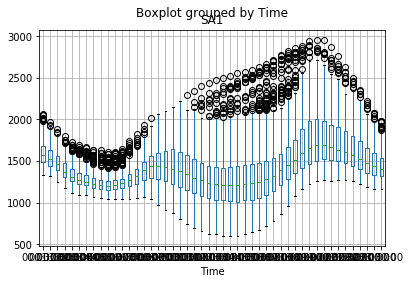

In [362]:
SAdf.boxplot(column='SA1', by='Time')
plt.show()
# boxplot by hour works well to show distribution of values across time of day

In [359]:
# pd.to_datetime([f"{h}:00" for h in range(24)], format="%H:%M").time
# did a lot of playing around trying to figure out the best way of setting the x-axis values
# pd.to_timedelta didn't help much at all unfortunately

In [110]:
print([f"{h}:00" for h in range(24)])

['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']


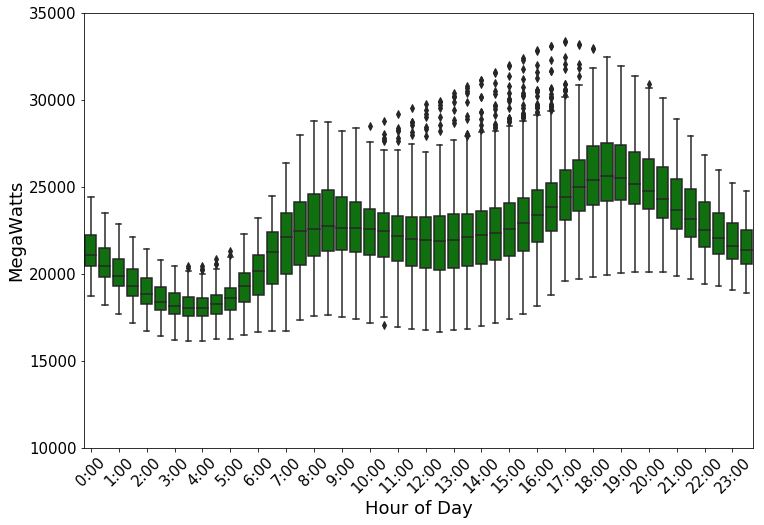

In [381]:
fig1, ax1 = plt.subplots(figsize=(12,8))
sns.boxplot(x=alldf.Time, y=alldf.NEMtotal, color='g')
ax1.set_xticks(range(0,48,2))
ax1.set_xticklabels([f"{h}:00" for h in range(24)], fontsize=15)
plt.setp(ax1.get_yticklabels(), fontsize=15)
ax1.set_ylabel('MegaWatts', fontsize=18)
ax1.set_xlabel('Hour of Day', fontsize=18)
ax1.set_ylim(1e4, 3.5e4)
plt.xticks(rotation=45)
plt.savefig('NEMtotal-hourly-boxplot.png')
plt.show()
# seaborn boxplot by hour looks better, and is more flexible

In [130]:
alldf.Month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [131]:
alldf.nmonth.unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [155]:
[(n,m) for n,m in zip(alldf.Month.unique(), alldf.nmonth.unique())]
# luckily enough (or not by luck) the unique() function is listing the names and month numbers in corresponding 
# order making it easy to zip them - used below for generating the 12 plots by month

[(12, 'December'),
 (1, 'January'),
 (2, 'February'),
 (3, 'March'),
 (4, 'April'),
 (5, 'May'),
 (6, 'June'),
 (7, 'July'),
 (8, 'August'),
 (9, 'September'),
 (10, 'October'),
 (11, 'November')]

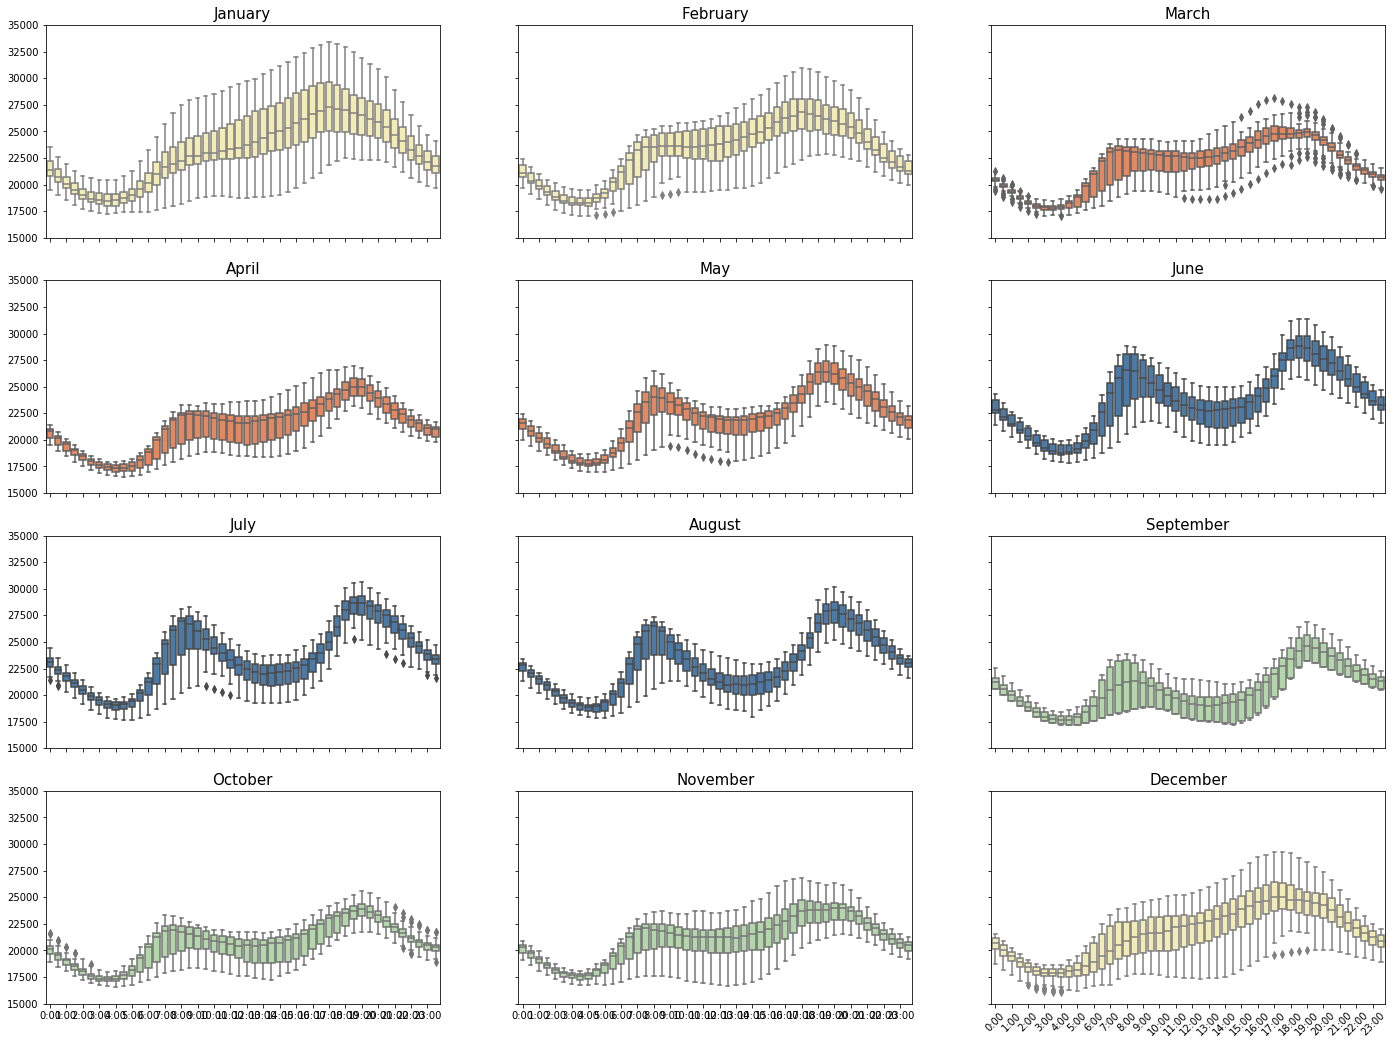

CPU times: user 6.86 s, sys: 49 ms, total: 6.91 s
Wall time: 6.93 s


In [275]:
%%time
fig2, ax2 = plt.subplots(nrows=4, ncols=3, figsize=(24,18), sharex=True, sharey=True)
ax2 = ax2.flatten()
plt.xticks(rotation=45)
plt.ylim(15000,35000)
cmaplist = sns.color_palette('Spectral',12)
seasons = dict(zip(range(1,13),[(cmaplist[n]) for n in [5,5,2,2,2,11,11,11,8,8,8,5]]))
# plt.suptitle("NEM Power Demand (MW) vs hour of day, monthly distribution, 2018")

for n,m in zip(alldf.Month.unique(), alldf.nmonth.unique()):
    sns.boxplot(x='Time', y='NEMtotal', data=alldf[['Time','NEMtotal']][alldf['Month'] == n], color=seasons[n], ax=ax2[n-1])
    ax2[n-1].set_xticks(range(0,48,2))
    ax2[n-1].set_xticklabels([f"{h}:00" for h in range(24)])
    ax2[n-1].set_title(m,fontsize=15)
    ax2[n-1].set_ylabel(None)
    ax2[n-1].set_xlabel(None)
    
plt.savefig("boxplt_NEMtotal_month_season.png")
plt.show()

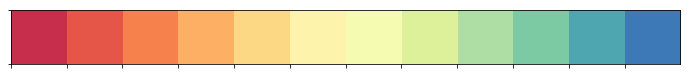

In [364]:
cmaplist = sns.color_palette('Spectral',12)

sns.palplot(cmaplist)

In [365]:
# cmaplist[3:6][::-1]

In [366]:
# sns.palplot([cmaplist[5], cmaplist[2], cmaplist[8], cmaplist[11]])

In [367]:
# [cmaplist[5], cmaplist[2], cmaplist[7], cmaplist[11]]

In [368]:
# dict(zip(range(1,13),[(cmaplist[n]) for n in [5,5,2,2,2,8,8,8,11,11,11,5]]))

In [249]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, StratifiedShuffleSplit, ShuffleSplit
from sklearn.linear_model import LinearRegression

In [227]:
nSA = SAdf.dropna()

In [229]:
print(SAdf.shape)
print(nSA.shape)

(18816, 9)
(17760, 9)


In [215]:
sa_lnr = LinearRegression()

In [385]:
xsa = nSA[nSA.columns[2:-1]]
xsa.head(2)

,Year,Month,DayofMonth,isWeekend,AdldWT_MaxT_23000,AdldWT_MinT_23000
2017-12-24 00:00:00,2017,12,24,1,24.1,16.0
2017-12-24 00:30:00,2017,12,24,1,24.1,16.0


In [386]:
xsa['Hour'] = xsa.index.hour + (xsa.index.minute/60)
xsa.head()

/Users/pat.hearps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Year,Month,DayofMonth,isWeekend,AdldWT_MaxT_23000,AdldWT_MinT_23000,Hour
2017-12-24 00:00:00,2017,12,24,1,24.1,16.0,0.0
2017-12-24 00:30:00,2017,12,24,1,24.1,16.0,0.5
2017-12-24 01:00:00,2017,12,24,1,24.1,16.0,1.0
2017-12-24 01:30:00,2017,12,24,1,24.1,16.0,1.5
2017-12-24 02:00:00,2017,12,24,1,24.1,16.0,2.0


In [239]:
ysa = nSA[['SA1']]

In [243]:
s3 = StratifiedShuffleSplit(n_splits=6, test_size=0.25)
s3.split(xsa, ysa)

<generator object BaseShuffleSplit.split at 0x1a2bc7b830>

In [391]:
%%time

cv_sa_sc = cross_val_score(sa_lnr, X=xsa, y=ysa, cv=ShuffleSplit(n_splits=10, test_size=0.25))

CPU times: user 128 ms, sys: 4.72 ms, total: 132 ms
Wall time: 80.5 ms


In [390]:
sa_lnr.fit(xsa, ysa)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

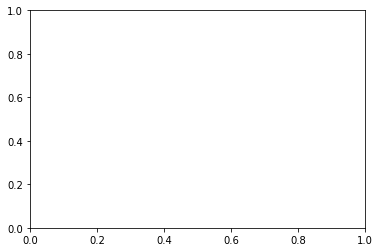

In [398]:
sns.(xsa, sa_lnr.predict(xsa))

In [323]:
mnxSA = SAdf.groupby('Date')[['SA1']].max()
mnxSA.head()

,SA1
Date,
2017-12-24,1580.0
2017-12-25,1457.0
2017-12-26,1861.0
2017-12-27,2113.0
2017-12-28,1744.0


In [324]:
mnxSA = mnxSA.merge(SAdf[['AdldWT_MaxT_23000','AdldWT_MinT_23000','Date']], how='left', left_index=True, right_on='Date').drop(columns='Date')
mnxSA.head()

,SA1,AdldWT_MaxT_23000,AdldWT_MinT_23000
2017-12-24 00:00:00,1580.0,24.1,16.0
2017-12-24 00:30:00,1580.0,24.1,16.0
2017-12-24 01:00:00,1580.0,24.1,16.0
2017-12-24 01:30:00,1580.0,24.1,16.0
2017-12-24 02:00:00,1580.0,24.1,16.0


In [325]:
mapseason = [1]*2 + [2]*3 + [3]*3 + [2]*3 + [1]
mapseason

[1, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 1]

In [326]:
dseason_dict = dict(zip(range(1,13), mapseason))
dseason_dict

{1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 2, 10: 2, 11: 2, 12: 1}

In [327]:
mnxSA['Season'] = mnxSA.index.month.map(dseason_dict)
mnxSA.head(3)

,SA1,AdldWT_MaxT_23000,AdldWT_MinT_23000,Season
2017-12-24 00:00:00,1580.0,24.1,16.0,1
2017-12-24 00:30:00,1580.0,24.1,16.0,1
2017-12-24 01:00:00,1580.0,24.1,16.0,1


In [329]:
mnxSA.Season.value_counts()

2    8784
1    5616
3    4416
Name: Season, dtype: int64

In [331]:
mnxSA.Season.isnull().sum()

0

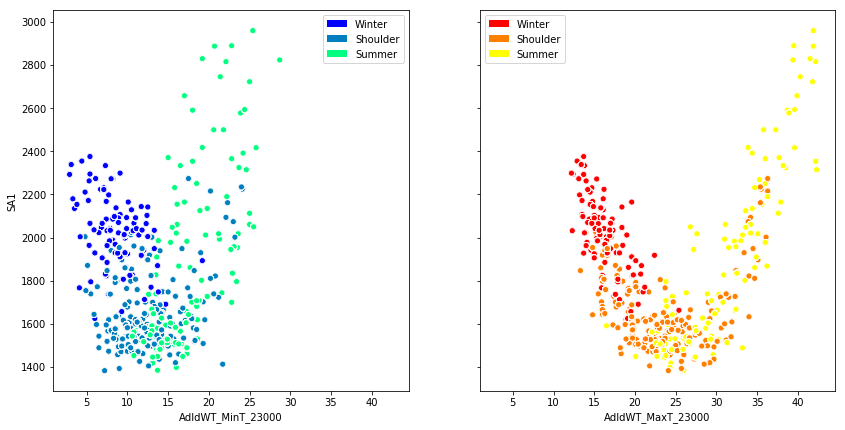

In [358]:
fig3, ax3 = plt.subplots(ncols=2, figsize=(14,7), sharex=True, sharey=True)

sns.scatterplot(data=mnxSA, x='AdldWT_MinT_23000', y='SA1', hue='Season', palette = plt.cm.winter_r, ax=ax3[0], legend=False)
sns.scatterplot(data=mnxSA, x='AdldWT_MaxT_23000', y='SA1', hue='Season', palette = plt.cm.autumn_r, ax=ax3[1], legend=False)

wintleg =[ptch.Patch(facecolor=plt.cm.winter_r(0.999), label='Winter', alpha = 1),
             ptch.Patch(facecolor=plt.cm.winter_r(0.5), label='Shoulder', alpha = 1),
            ptch.Patch(facecolor=plt.cm.winter_r(0.001), label='Summer', alpha = 1)]

summleg =[ptch.Patch(facecolor=plt.cm.autumn_r(0.999), label='Winter', alpha = 1),
             ptch.Patch(facecolor=plt.cm.autumn_r(0.5), label='Shoulder', alpha = 1),
            ptch.Patch(facecolor=plt.cm.autumn_r(0.001), label='Summer', alpha = 1)]

ax3[0].legend(handles=wintleg)
ax3[1].legend(handles=summleg)

# ax3[0].legend(labels=['Winter', 'Shoulder', 'Summer'],  handles=[plt.Line2D(color=plt.cm.winter_r(0))])
plt.savefig('minmax_Demand_v_Temp_SA1.png')
plt.show()

In [278]:
SAdf.head()

,Date,Time,Year,Month,DayofMonth,isWeekend,AdldWT_MaxT_23000,AdldWT_MinT_23000,SA1
2017-12-24 00:00:00,2017-12-24,00:00:00,2017,12,24,1,24.1,16.0,1580.0
2017-12-24 00:30:00,2017-12-24,00:30:00,2017,12,24,1,24.1,16.0,1513.0
2017-12-24 01:00:00,2017-12-24,01:00:00,2017,12,24,1,24.1,16.0,1448.0
2017-12-24 01:30:00,2017-12-24,01:30:00,2017,12,24,1,24.1,16.0,1358.0
2017-12-24 02:00:00,2017-12-24,02:00:00,2017,12,24,1,24.1,16.0,1310.0


In [281]:
etdata

,Date,Time,Year,Month,DayofMonth,isWeekend,AdldWT_MaxT_23000,AdldWT_MinT_23000,SA1
2018-01-01 00:00:00,2018-01-01,00:00:00,2018,1,1,0,24.3,16.0,1398.0
2018-01-01 00:30:00,2018-01-01,00:30:00,2018,1,1,0,24.3,16.0,1359.0
2018-01-01 01:00:00,2018-01-01,01:00:00,2018,1,1,0,24.3,16.0,1316.0
2018-01-01 01:30:00,2018-01-01,01:30:00,2018,1,1,0,24.3,16.0,1240.0
2018-01-01 02:00:00,2018-01-01,02:00:00,2018,1,1,0,24.3,16.0,1194.0
2018-01-01 02:30:00,2018-01-01,02:30:00,2018,1,1,0,24.3,16.0,1163.0
2018-01-01 03:00:00,2018-01-01,03:00:00,2018,1,1,0,24.3,16.0,1151.0
2018-01-01 03:30:00,2018-01-01,03:30:00,2018,1,1,0,24.3,16.0,1133.0
2018-01-01 04:00:00,2018-01-01,04:00:00,2018,1,1,0,24.3,16.0,1115.0
2018-01-01 04:30:00,2018-01-01,04:30:00,2018,1,1,0,24.3,16.0,1106.0


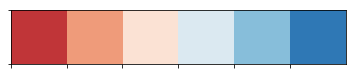

In [290]:
sns.palplot(sns.color_palette('RdBu'))

In [299]:
# plt.cm.RdBu(0.5)
tempcolor

0.0862944162436548

In [303]:
range(1,SAdf.DayofMonth[SAdf.Month == mon].max()+1)

range(1, 32)

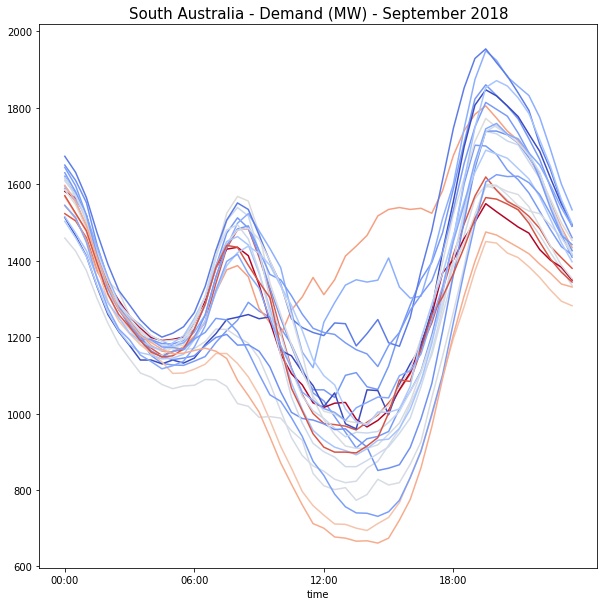

In [389]:
fig4, ax4 = plt.subplots(figsize=(10,10))

yr = 2018
mon = 9

minT = SAdf.AdldWT_MaxT_23000[SAdf.Month == mon].min()
trange = SAdf.AdldWT_MaxT_23000[SAdf.Month == mon].max() - minT

for day in range(1,SAdf.DayofMonth[SAdf.Month == mon].max()+1):
    etdata = SAdf[(SAdf.Month == mon) & (SAdf.Year == yr) & (SAdf.DayofMonth == day)]
    tempcolor = plt.cm.coolwarm(((etdata.AdldWT_MaxT_23000.max() - minT) / trange))

    ax4.plot('Time', 'SA1', data=etdata, color=tempcolor)

ax4.set_xticks([f"{h}:00" for h in range(0,24,6)])
ax4.set_title("South Australia - Demand (MW) - September 2018", fontsize=15)

plt.savefig('eachday-Sept-SA-demand-tempcolormap.png')
plt.show()